In [1]:
import os
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pickle
from datetime import datetime
import seaborn as sns

In [2]:
from data_loader import DataLoader
loader = DataLoader()

/opt/miniconda3/envs/thesis/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/thesis/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


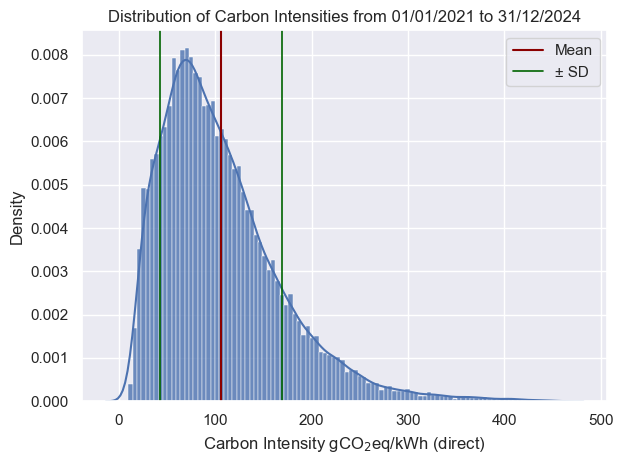

In [3]:
loader.plot_hist()